DSML investigation:

You are part of the Suisse Impossible Mission Force, or SIMF for short. You need to uncover a rogue agent that is trying to steal sensitive information.

Your mission, should you choose to accept it, is to find that agent before stealing any classified information. Good luck!

# Assignement part four
#### Identifying the suspects' credit score
We received informations that the rogue agent has a good credit score.

Our spies at SIMF have managed to collect financial information relating to our suspects as well as a training dataset.

Create a Neural Network over the training dataset `df` to identify which of the suspects have a good Credit_Mix


## Getting to know our data

* Age: a users age
* Occupation: a users employment field
* Annual_Income: a users annual income
* Monthly_Inh_Salary: the calculated salary received by a given user on a monthly basis
* Num_Bank_Accounts: the number of bank accounts possessed by a given user
* Num_Credit_Cards: the number of credit card given user possesses
* Interest_Rate: The interest rate on those cards (if multiple then its the average)
* Num_of_Loans: The number of loans of each user
* Delay_from_due_date: payment tardiness of user
* Num_of_Delayed_Payment: the count of delayed payments
* Changed_Credit_Limit: changes made to the credit limit for each user's account
* Num_Credit_Inquiries: number of credit inquiries
* Credit_Mix: The users credit score
* Outsting_Debt: Outstanding debt
* Credit_Utilization_Ratio: the percentage of borrowed money over borrowing allowance
* Payment_of_Min_Amount: does the user usually pay the minimal amount (categorical)
* Total_EMI_per_month: Monthly repayments to be made
* Amount_invested_monthly: The amout put in an investment fund by the user on a monthly basis
* Payment_Behaviour: the users payment behavior (categorical)
* Monthly_Balance: The users end of the month balance
* AutoLoan: If the user has an active loan for their vehicule
* Credit-BuilderLoan: If the user has a loan to increase their credit score
* DebtConsolidationLoan, HomeEquityLoan, MortgageLoan, NotSpecified, PaydayLoan, PersonalLoan, StudentLoan: different types of loans(categorical features)



In [1]:
# Import required packages
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/train_classification.csv", index_col='Unnamed: 0').dropna()
suspects = pd.read_csv("https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/suspects.csv", index_col='Unnamed: 0').dropna()

In [3]:
from google.colab import files
file_name = 'df.xlsx'
df.to_excel(file_name, index=True)
#files.download(file_name)

In [4]:
file_name = 'suspects.xlsx'
suspects.to_excel(file_name, index=True)
#files.download(file_name)

In [5]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inh_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Monthly_Balance,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,186.266702,1,1,0,1,0,0,0,1,0
1,24,Scientist,19114.12,1824.843333,3,4,3,4,3,9,...,361.444004,1,1,0,1,0,0,0,1,0
3,24,Scientist,19114.12,4182.004291,3,4,3,4,4,5,...,343.826873,1,1,0,1,0,0,0,1,0
5,28,Teacher,34847.84,3037.986667,2,4,6,1,3,3,...,303.355083,0,1,0,0,0,0,0,0,0
8,35,Engineer,143162.64,4182.004291,1,5,8,3,8,1942,...,854.226027,2,0,0,0,0,1,0,0,0


In [6]:
df["Credit_Mix"].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [7]:
suspects.head()

,Age,Annual_Income,Monthly_Inh_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,userID
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,317991
1,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,9.0,13.27,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,241892
3,24.0,19114.12,4182.004291,3.0,4.0,3.0,4.0,4.0,5.0,11.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,303376
5,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,3.0,5.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,761992
8,35.0,143162.64,4182.004291,1.0,5.0,8.0,3.0,8.0,1942.0,7.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,373318


# 1. Preparing the data

## 1.1 Data cleaning
Perform One-Hot Encoding over the "Occupation" feature.

Then, perform Label Encoding over "Payment_of_Min_Amount" and "Payment_Behaviour".

After performing the one-hot and label encoding, add the encoded features to the data frame and remove the corresponding categorical features.

In [8]:
# Perfrom one-hot encoding for "Occupation"
df_encoded = pd.get_dummies(df, columns=["Occupation"], prefix=["Occupation"])

df_encoded.head()

,Age,Annual_Income,Monthly_Inh_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,False,False,False,False,False,False,False,True,False,False
1,24,19114.12,1824.843333,3,4,3,4,3,9,13.27,...,False,False,False,False,False,False,False,True,False,False
3,24,19114.12,4182.004291,3,4,3,4,4,5,11.27,...,False,False,False,False,False,False,False,True,False,False
5,28,34847.84,3037.986667,2,4,6,1,3,3,5.42,...,False,False,False,False,False,False,False,False,True,False
8,35,143162.64,4182.004291,1,5,8,3,8,1942,7.10,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Perform label encoding for "Payment_of_Min_Amount" and "Payment_Behaviour"
df_encoded["Payment_of_Min_Amount"] = label_encoder.fit_transform(df_encoded["Payment_of_Min_Amount"])
df_encoded["Payment_Behaviour"] = label_encoder.fit_transform(df_encoded["Payment_Behaviour"])

df_encoded[["Payment_of_Min_Amount", "Payment_Behaviour"]].head()

,Payment_of_Min_Amount,Payment_Behaviour
0,1,6
1,1,2
3,1,2
5,1,4
8,1,5


## 1.2 Dataset splitting and rescaling

a) Split the dataset in two, first X with your independent features and then y with the dependent feature **CreditMix**.

b) Split X and y into training and test sets. The training set should contain 80% of the observations, and the test set should contain the remaining 20%. Set random state equal to 42.

c) Then perform :
* Label Encoding over the **CreditMix** feature.
* A MinMaxScaller over all the independent features.

In [10]:
# a) Split the dataset into independent features (X) and the dependent feature (y)
X = df_encoded.drop(columns=["Credit_Mix"])
y = df_encoded["Credit_Mix"]

X.shape, y.shape

((29223, 42), (29223,))

In [11]:
# b) Split X and y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((23378, 42), (23378,)), ((5845, 42), (5845,)))

In [12]:
# c)

# Re-initialize the label encoder to avoid fitting issues
label_encoder_cm = LabelEncoder()

# Perform label encoding for 'Credit_Mix' in both training and test sets
y_train_encoded = label_encoder_cm.fit_transform(y_train)
y_test_encoded = label_encoder_cm.transform(y_test)

y_train_encoded[:5]

array([2, 1, 0, 0, 2])

In [13]:
# c

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5, :5]

array([[5.75051930e-02, 3.54007535e-03, 4.70443182e-01, 3.36322870e-03,
        4.00266845e-03],
       [5.80518203e-02, 9.78445765e-04, 2.60275285e-01, 1.12107623e-03,
        1.33422282e-03],
       [5.76145184e-02, 4.76963581e-04, 9.04830108e-02, 5.04484305e-03,
        5.33689126e-03],
       [5.64119383e-02, 1.04392250e-03, 1.70415407e-01, 6.16591928e-03,
        5.33689126e-03],
       [5.70678911e-02, 3.92526367e-03, 5.57366708e-01, 5.04484305e-03,
        3.33555704e-03]])

### 1.2.2 Final touches
Convert your datasets to `Torch tensors` of type `torch.float` for X and `torch.long` for y.

In [14]:
# Convert the scaled training and test sets to Torch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float)

# Convert the encoded labels to Torch tensors
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

(X_train_tensor.dtype, y_train_tensor.dtype), (X_test_tensor.dtype, y_test_tensor.dtype)

((torch.float32, torch.int64), (torch.float32, torch.int64))

# 2 Model preparation:

## 2.1 Define a Neural network model and instantiate it.
Set the following parameters:
* `hidden layer` : 1 with 150 neurons;
* `activation function` : ReLU
* `criterion` : [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)

In [15]:
# Define the neural network class
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)   # Input to hidden layer
        self.relu = nn.ReLU()                           # Activation function
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Hidden to output layer

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [16]:
# Compute number of features (input_size) and number of unique classes (num_classes)
input_size = X_train_tensor.shape[1]
num_classes = len(torch.unique(y_train_tensor))

## 2.2 Finding the best model:
Identify, amongst the following options the best parameters for your model:

* `criterion` : [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
* `iterations` : 150, 250, 500, 1000
* `learning rate` : 0.00005, 0.001, 1.049, 12.031

Set `random seed` as torch.manual_seed(42).


_Hint: restart your runtime between each execution to ensure that previous neural networks dont interfere with your current one_

_You can evaluate your model based on it's accuracy over the test set_

In [17]:
def train_model(X_train, y_train, X_test, y_test, iterations, learning_rate):
    # Set the random seed for reproducibility
    torch.manual_seed(42)

    # Initialize the network
    model = Net(input_size, hidden_size=150, num_classes=num_classes)

    # Criterion and Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Training Loop
    for epoch in range(iterations):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test).float().mean().item()

    return accuracy

In [18]:
# Hyperparameter Tuning
best_accuracy = 0
best_params = {}

iteration_options = [150, 250, 500, 1000]
learning_rate_options = [0.00005, 0.001, 1.049, 12.031]

for iterations in iteration_options:
    for lr in learning_rate_options:
        accuracy = train_model(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, iterations, lr)
        print(f"Iterations: {iterations}, Learning Rate: {lr}, Accuracy: {accuracy:.2f}%")

        # Update the best parameters and accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'iterations': iterations, 'learning_rate': lr}

print(f"Best Accuracy: {best_accuracy:.2f}%")
print(f"Best Parameters: {best_params}")

Iterations: 150, Learning Rate: 5e-05, Accuracy: 0.23%
Iterations: 150, Learning Rate: 0.001, Accuracy: 0.31%
Iterations: 150, Learning Rate: 1.049, Accuracy: 0.81%
Iterations: 150, Learning Rate: 12.031, Accuracy: 0.45%
Iterations: 250, Learning Rate: 5e-05, Accuracy: 0.24%
Iterations: 250, Learning Rate: 0.001, Accuracy: 0.44%
Iterations: 250, Learning Rate: 1.049, Accuracy: 0.83%
Iterations: 250, Learning Rate: 12.031, Accuracy: 0.45%
Iterations: 500, Learning Rate: 5e-05, Accuracy: 0.24%
Iterations: 500, Learning Rate: 0.001, Accuracy: 0.46%
Iterations: 500, Learning Rate: 1.049, Accuracy: 0.84%
Iterations: 500, Learning Rate: 12.031, Accuracy: 0.45%
Iterations: 1000, Learning Rate: 5e-05, Accuracy: 0.24%
Iterations: 1000, Learning Rate: 0.001, Accuracy: 0.45%
Iterations: 1000, Learning Rate: 1.049, Accuracy: 0.84%
Iterations: 1000, Learning Rate: 12.031, Accuracy: 0.45%
Best Accuracy: 0.84%
Best Parameters: {'iterations': 1000, 'learning_rate': 1.049}


*Question 1:*

**Could we use BCELoss instead of CrossEntropyLoss?**

# 3. Predict over the suspects dataset

Now it's time to use the model to make predictions over the suspect dataset!

Use the following parameters:


* `hidden layer` : 1 with 150 neurons
* `output layer` : 3 neurons
* `optimizer` : [Stochastic Gradient Descent (SGD)](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)
* `criterion` : [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
* `iterations` : 1000
* `learning rate` : 1.049

Set `random seed` as np.random.seed(42)



*Question 2:*

**Why does our model has 3 neurons in the output layer?**

In [19]:
# Prepare the suspects data similarly to the training data

# Extract features from the suspects DataFrame that match those used in training
features_suspects = suspects[X_train.columns]

# Scale the numerical features using the same scaler as for the training data
features_suspects_scaled = scaler.transform(features_suspects)

# Convert the scaled features to a Torch tensor
suspects_tensor = torch.tensor(features_suspects_scaled, dtype=torch.float)

In [20]:
# Ensure reproducibility
np.random.seed(42)
torch.manual_seed(42)

In [21]:
# Define the neural network architecture
class CreditNet(nn.Module):
    def __init__(self):
        super(CreditNet, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 150)  # Input to hidden layer
        self.fc2 = nn.Linear(150, 3)                        # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [22]:
# Initialize the model, criterion, and optimizer
model = CreditNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1.049)

In [23]:
# Training loop
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if epoch % 100 == 99:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 100, Loss: 0.43516579270362854
Epoch 200, Loss: 0.3651857376098633
Epoch 300, Loss: 0.352828711271286
Epoch 400, Loss: 0.34369051456451416
Epoch 500, Loss: 0.3384329676628113
Epoch 600, Loss: 0.3347684144973755
Epoch 700, Loss: 0.32867029309272766
Epoch 800, Loss: 0.3253355324268341
Epoch 900, Loss: 0.3254360556602478
Epoch 1000, Loss: 0.3224521279335022


Display the table with two columns: 'userID' and the corresponding predicted Credit_Mix.

In [24]:
# Predict over the suspects dataset
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    logits = model(suspects_tensor)
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    predicted_classes = torch.argmax(probabilities, dim=1)

# Convert predicted classes to the original Credit_Mix labels
predicted_credit_mix = label_encoder_cm.inverse_transform(predicted_classes.numpy())

# Create a DataFrame with userID and the corresponding predicted Credit_Mix
results_df = pd.DataFrame({
    'userID': suspects['userID'],
    'Predicted_Credit_Mix': predicted_credit_mix
})
results_df

,userID,Predicted_Credit_Mix
0,317991,Good
1,241892,Good
3,303376,Good
5,761992,Good
8,373318,Good
...,...,...
1231,458293,Standard
1233,218415,Standard
1235,173906,Standard
1236,178685,Bad


As mentioned in the beginning, we have reasons to believe that the suspect had a very good credit score. But we must make no errors, because a lot is at stake. We must be consident in our predictions.

Therefore, we need to analyze not just the predicted category but also how certain the model is about each prediction. Display the probabilities of observations in the 'suspects' dataset falling within the given classes.

_Hint: you can display the probabilities simply as a dataframe, but for better overview you can use visualization tools_

In [25]:
# Create a DataFrame with probabilities and add userID and predicted labels
probabilities_df = pd.DataFrame(probabilities.numpy(), columns=label_encoder_cm.classes_)
probabilities_df['userID'] = suspects['userID'].values
probabilities_df['Predicted_Credit_Mix'] = predicted_credit_mix
probabilities_df

,Bad,Good,Standard,userID,Predicted_Credit_Mix
0,0.000053,8.448428e-01,0.155105,317991,Good
1,0.000033,8.355056e-01,0.164461,241892,Good
2,0.000031,8.972563e-01,0.102713,303376,Good
3,0.000011,9.102231e-01,0.089765,761992,Good
4,0.000074,8.803217e-01,0.119604,373318,Good
...,...,...,...,...,...
709,0.067209,3.360817e-04,0.932455,458293,Standard
710,0.003649,3.704506e-04,0.995980,218415,Standard
711,0.004445,2.251444e-04,0.995330,173906,Standard
712,0.980339,3.453815e-05,0.019626,178685,Bad


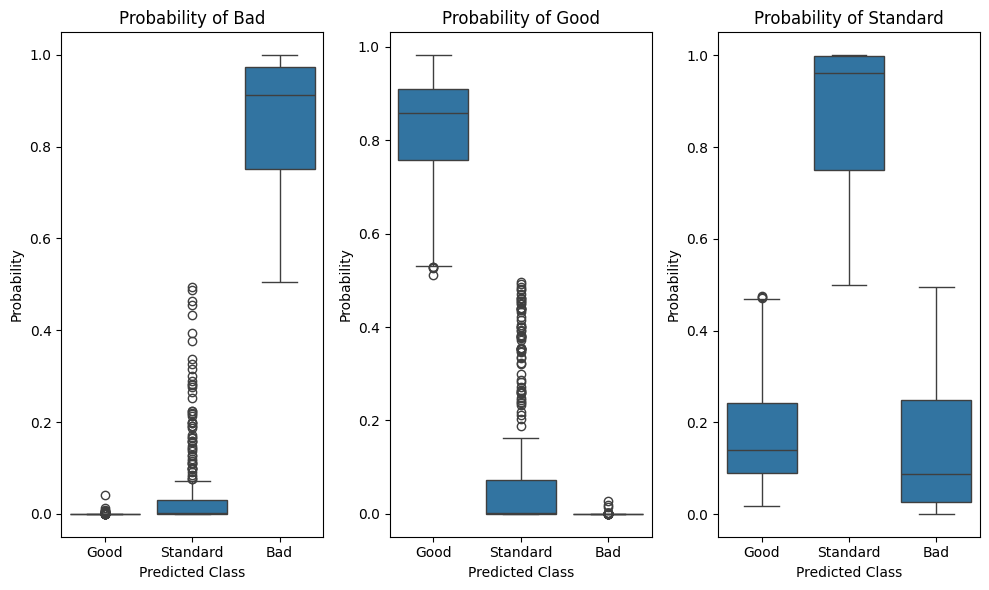

In [26]:
import seaborn as sns

plt.figure(figsize=(10, 6))

# Create a boxplot for each class probability, grouped by the predicted class label
for i, class_label in enumerate(label_encoder_cm.classes_):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Predicted_Credit_Mix', y=class_label, data=probabilities_df)
    plt.title(f'Probability of {class_label}')
    plt.xlabel('Predicted Class')
    plt.ylabel('Probability')
plt.tight_layout()
plt.show()

*Question 3:*

**Which of the following suspects have a good credit mix according to your model's predictions?**


*   200865
*   761992
*   858566
*   862880
*   526987


In [27]:
# Filter the results for the specified userIDs
specified_user_ids = [200865, 761992, 858566, 862880, 526987]
filtered_results = results_df[results_df['userID'].isin(specified_user_ids)]

# Find the suspects predicted to have a 'Good' credit mix
good_credit_suspects = filtered_results[filtered_results['Predicted_Credit_Mix'] == 'Good']
print(good_credit_suspects)

      userID Predicted_Credit_Mix
5     761992                 Good
1093  526987                 Good
